# PUBG - Finish Placement Prediction

- 65,000 게임의 데이터 셋을 이용하여 플레이어들이 전장에서 벌이는 모든 행위를 분류하여 승리를 예측하는 데이터 셋이다.
- 데이터 셋 : https://www.kaggle.com/c/pubg-finish-placement-prediction/data
- 데이터 셋의 경우 PUBG의 개발자 API를 통해 수집한 데이터를 Kaggle에서 그대로 가져왔다고 한다.

## 라이브러리 및 데이터 불러오기

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

train_df = pd.read_csv('./pubg-finish-placement-prediction/train_V2.csv')
test_df = pd.read_csv('./pubg-finish-placement-prediction/test_V2.csv')

pd.set_option('display.max_columns', None)

In [2]:
train_df.tail(10)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4446956,dae05e0d743059,3902915a7a1943,97b64a07c05761,1,0,151.90,0,0,1,77,0,0,0,0.00,1693,squad-fpp,29,28,1500,1,0.0,0,0.000,0,0,828.30,7,0,0.1071
4446957,2a4163ccbe0e3b,2689c981578849,eebc058a45ff13,0,1,100.00,0,0,0,32,0,1,1,12.02,1396,duo-fpp,49,49,1546,1,0.0,0,0.000,0,0,363.70,2,0,0.4583
4446958,837349af7e8a35,58bc4104935623,2001300d4f5787,0,0,0.00,0,0,0,92,0,0,0,0.00,1414,duo-fpp,48,44,1546,0,0.0,0,0.000,0,0,0.00,0,0,0.0000
4446959,d29bfa313ad766,ac3f1b4a56e5ad,2f3b1af94739b3,0,0,22.68,0,0,0,89,0,0,0,0.00,1456,solo-fpp,96,95,1787,0,0.0,0,0.000,0,0,40.25,1,0,0.0842
4446960,69fa4c2d5431b1,2a3ad0e37fb6ce,818ccf2160343f,0,0,327.70,3,2,0,4,0,4,3,90.25,1936,squad-fpp,30,28,1477,0,180.4,0,0.000,0,0,845.60,3,0,0.2414
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,1029,0,0,0.00,1873,squad-fpp,29,28,-1,0,1292.0,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,0,0,0,0.00,1435,solo,93,93,1501,0,0.0,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,0,0,0,0.00,1321,squad-fpp,28,28,1500,0,0.0,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,0,2,1,98.50,1373,squad-fpp,26,25,1418,2,0.0,0,0.000,0,0,2748.00,8,0,0.8000
4446965,0d8e7ed728b6fd,8c74f72fedf5ff,62a16aabcc095c,0,2,268.00,0,0,1,18,0,2,1,78.25,1766,solo-fpp,98,94,1590,0,1369.0,0,0.000,0,0,1244.00,5,0,0.5464


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

- Id
- groupId : 그룹 ID, 매치안에서 같은 그룹일 경우 같은 ID를 부여받는다. 
- matchId : 매치 ID, train, test에 중복된 match는 없다. 
- assists : 어시스트, 사살에 도움을 준 횟수
- boosts : 사용된 부스트 아이템 개수  
- damageDealt : 가한 데미지 총합 
- DBNOs : 기절 시킨 적의 수 
- headshotKills : 헤드샷으로 사살한 적의 수 
- heals : 사용된 치유 아이템 개수
- killPlace : 한 매치에서 킬 기준으로 집계된 등수
- killPoints : 킬 기준 포인트
- kills : 사살한 적의 수
- killStreaks : 단 시간내 연속적으로 사살한 적의 수  
- longestKill : 최장으로 사살한 거리. (다소 오류가 있다고 한다.)
- matchDuration : 매치 총 시간
- matchType : 사용자가 지정한 매치 타입의 수 ex) solo, duo, squad, solo-fpp, 기타는 이벤트 또는 사용자 지정
- maxPlace : 매치내 가장 낮은 등수. (다소 오류가 있음)
- numGroups : 매치 내 총 팀의 수  
- rankPoints : 플레이어 순위. (일관성이 없고 오류가 많다.) 
- revives : 팀원을 살린 횟수  
- rideDistance : 탈것을 통해 이동한 총 거리
- roadKills : 탈것으로 적을 죽인 횟수  
- swimDistance : 수영하여 이동한 총 거리
- teamKills : 팀킬한 횟수
- vehicleDestroys : 탈것을 파괴한 횟수
- walkDistance : 걸어서 총 이동한 거리
- weaponsAcquired : 총 획득 무기 수 
- winPoints : 승리 기준 포인트
- winPlacePerc : 타겟데이터, 1은 1등, 0은 꼴등. 누락이 있다고 함.

In [4]:
train_df.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

- 비교적 잘 정돈된 데이터, 다만 오류가 있다는 longstkilll, maxplace, rankpoints 는 drop하는게 좋을 듯 하다.

## EDA 및 기초 통계 분석

In [5]:
train_df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

- Id, groupId, matchId 드랍, 승리한 group id만을 모아 특성을 분석할수도 있겠으나 다른 접근방식이므로 여기선 제거.
- longestKill, maxPlace, rankPoints 역시 오류가 많은 데이터로 드랍

- 딜량, 기절 시킨 적의 수, 사살한 적의 수, 킬 포인트는 직관적으로 '좋은 실력' 과 큰 연관이 있어보인다. 
- 좋은 실력이 곧바로 우승으로 이어지는것인지는 더 분석해볼 여지가 있다.
- 헤드샷이나 연속적으로 죽인 적의 수 역시 '좋은 실력'과 연관있어 보인다. (일반적으로 단순사살보다 난이도가 있기때문)
- 어시스트, 부스트, 힐, 소생, 무기 취득, 탈것 파괴는 직관적으로 연관이 있어보이진 않는다.
- 걷기, 수영, 탈것 역시 위와 마찬가지.

In [6]:
train_df.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,2.299759e+01,1.579506e+03,4.450467e+01,4.300759e+01,8.920105e+02,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,5.097262e+01,2.587399e+02,2.382811e+01,2.328949e+01,7.366478e+02,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.367000e+03,2.800000e+01,2.700000e+01,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.438000e+03,3.000000e+01,3.000000e+01,1.443000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,2.132000e+01,1.851000e+03,4.900000e+01,4.700000e+01,1.500000e+03,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,1.094000e+03,2.237000e+03,1.000000e+02,1.000000e+02,5.910000e+03,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


직관적인 데이터 부터 살펴보자

### Kill & Damage

In [7]:
train_df['kills'].quantile(0.99)

7.0

- kill 의 평균은 0.9이고 상위 25% 이상부터 1킬, 그 이하는 1킬도 달성하지 못한다. 상위 1%는 7킬이상
- 최대값은 72로 나와있으나 이는 아웃라이어, 불법프로그램을 이용한 유저의 데이터 같다.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


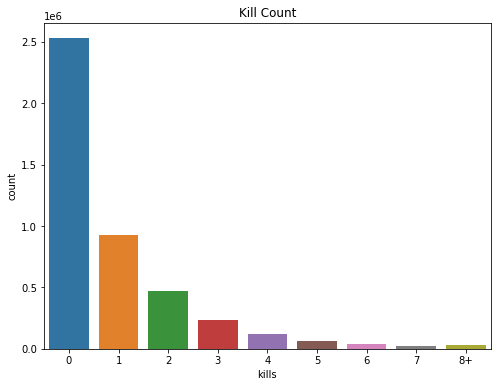

In [8]:
kill_data = train_df.copy()
kill_data.loc[kill_data['kills'] >= 8] = '8+'

plt.figure(figsize=(8,6))
plt.title("Kill Count")

sns.countplot(kill_data['kills'].astype('str').sort_values())
plt.show()

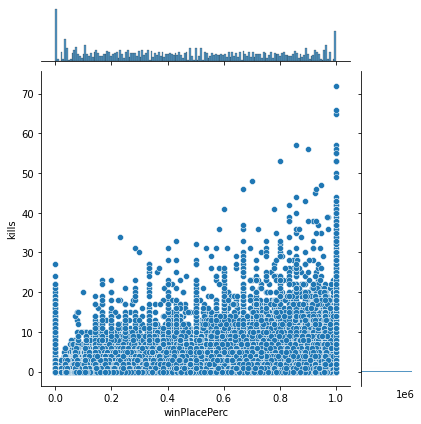

In [9]:
sns.jointplot(data=train_df, x='winPlacePerc', y='kills')
plt.show()

- 킬수와 승리는 상관관계가 존재한다. 흥미로운 점은 한번도 킬을 하지 않고 우승을 달성한 유저이다.
- 솔로의 경우 이는 불가능하고 이른바 '버스'탄다고 하는, 좋은 팀을 만나거나 꾸려서 승리를 달성한 경우이다.

- 데미지의 경우 킬과  밀접한 상관이 있을 수밖에 없다.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


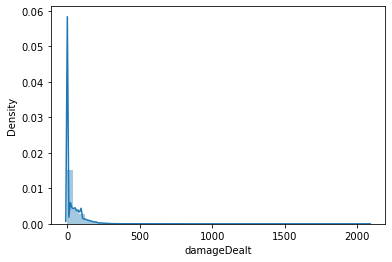

In [10]:
df = train_df.copy()
df = df[df['kills']==0]

sns.distplot(df['damageDealt'])
plt.show()

<AxesSubplot:xlabel='damageDealt', ylabel='Count'>

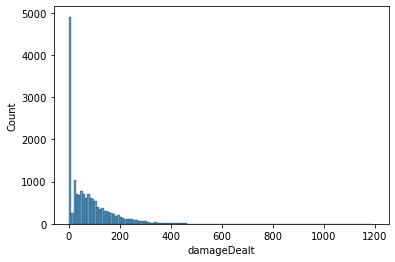

In [11]:
df = df[df['winPlacePerc'] == 1.0]
sns.histplot(data=df, x='damageDealt')

- 데미지 경우 한번도 사살하지 못한 유저의 경우 데미지도 주지 못한 경우가 대부분임을 알 수 있다.
- '버스'를 탄 유저를 보았을때 데미지를 주지못한, 제대로 편승한 유저가 대부분임을 알 수 있다.

In [12]:
df_0 = df[df['damageDealt']==0]

a = len(df)
b = len(df_0)
print(a, b)

16666 4709


In [13]:
df_0['matchType'].value_counts()

squad-fpp           2674
squad               1211
solo                 313
duo-fpp              295
duo                  122
normal-squad-fpp      70
crashfpp               7
normal-duo-fpp         6
normal-squad           3
crashtpp               3
normal-duo             1
normal-solo            1
solo-fpp               1
flaretpp               1
normal-solo-fpp        1
Name: matchType, dtype: int64

- 16666명의 유저는 0킬로 우승 그중 4770명은 유저 한 번 맞추지도 않고 우승을 했다.
- 4770명의 경우 대부분 스쿼드를 통해 우승을 달성. 솔로는 불법프로그램 이용일까?

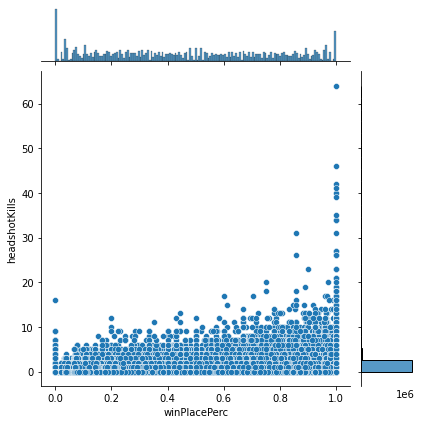

In [14]:
sns.jointplot(data=train_df, x='winPlacePerc', y='headshotKills')
plt.show()

- 헤드샷 킬과 승리 역시 상관관계가 있어보인다.
- 헤드샷 30명 이상은 불법프로그램이용으로 유추해볼 수 있지 않을까 싶다.

### Heal & Boost

- 치료와 부스트 아이템 사용은 직관적으로 우승과 연결지을 순 없지만 우승을 위해서 오래 플레이해야하고 많은 교전을 거쳐야 한다는 일반상식을 적용하였을때 충분한 상관관계가 있어 보인다. 
- 아웃라이어 제거를 위해 상위 1% 이상 data는 제거 한다.

- heals의 평균은 1.3으로 유저는 1.3의 치료아이템을 게임당 평균 사용하며 절반이상은 하나도 사용하지 않는데 이는 교전해보지도 못하고 죽는 유저의 수와 게임 특성상 교전 후 살아남은 유저만이 치료아이템을 사용할 수 있기 때문이다.
- boosts의 평균은 1.1으로 유저는 1.1의 부스트아이템을 게임당 평균 사용하며 절반 이상은 하나도 사용하지 않는다. 
- boosts는 heals와 비슷한 양상을 보인다. 나머지 체력의 회복 및 교전 전 반응속도를 빠르게 하기 위해 boosts아이템을 사용하는데 이 역시 '교전'과 연관되기 때문에 한번도 킬을 달성하지 못하고 데미지도 주지 못하는 유저가 많은 게임 특성상 낮은 사용율을 보인다.

In [15]:
a = train_df['heals'].quantile(0.99)
b = train_df['boosts'].quantile(0.99)
print(a, b)

12.0 7.0


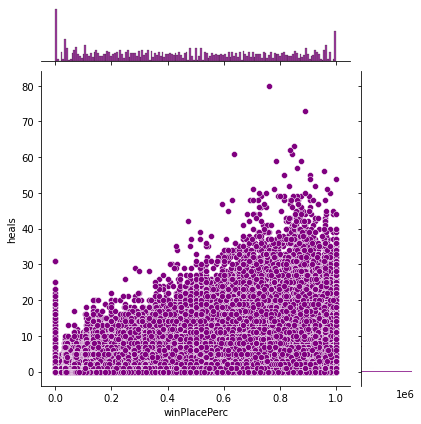

In [16]:
sns.jointplot(data=train_df, x='winPlacePerc', y='heals', color='purple')
plt.show()

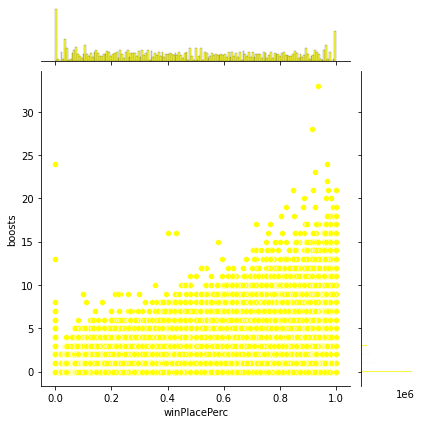

In [17]:
sns.jointplot(data=train_df, x="winPlacePerc", y="boosts", color="yellow")
plt.show()

- heals 와 boosts 모두 양의 상관관계를 보인다

### Walk & Ride & Swim

- walksDistance의 평균은 1154m를 뛰며 편차가 1200m 정도로 크다. 게임 초반 이동없이 교전이 이루어지는 특성 때문인가?
- rideDistance의 평균은 606m이며 50%이상은 차를 이용하지 않았다. 우승과 차량이용간 관계를 밝히는 것 역시 도움이 될 듯 하다.
- swimDistance의 평균은 4.5m이며 대부분은 수영을 하지 않았다. 섬이란 특성상 물은 섬 주변 혹은 강줄기에 희박하게 분포한다는 특성 때문이다.

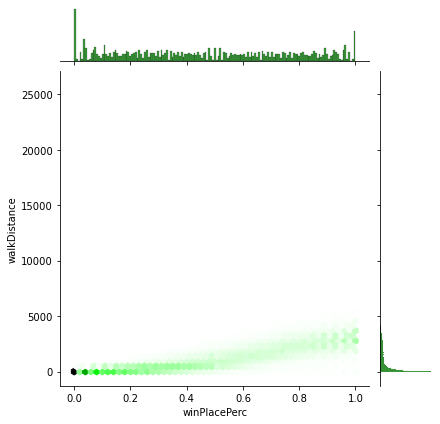

In [18]:
sns.jointplot(data=train_df, x='winPlacePerc', y='walkDistance', color='Green', kind='hex')
plt.show()

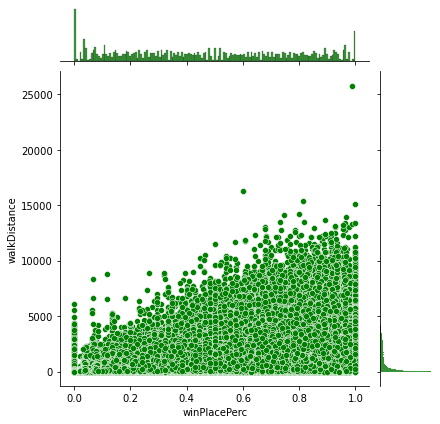

In [19]:
sns.jointplot(data=train_df, x='winPlacePerc', y='walkDistance', color='Green')
plt.show()

In [20]:
len(train_df[train_df['walkDistance'] == 0.0])

99603

In [21]:
len(train_df[train_df['walkDistance'] <= 100.0])

834241

- 분명한 양의 상관관계 존재. 많은 유저가 게임 초반, 교전이 이루어질때 사망함을 알 수 있다.
- 한번도 움직이지 않은(혹은 못한) 유저는 10만명정도, 100m라는 짧은 거리(교전 초반)를 이동하고 죽은 유저는 83만정도로 약 20%에 해당한다.

### Solo, Duo, Squad

- 배틀그라운드 게임의 경우 유저는 게임을 혼자 즐기거나 팀을 꾸려 즐길 수 있는데 팀의 경우 (2인, 4인) 두 가지 팀의 양상이 존재한다.
- 팀 게임에 혼자 참여하여 즐기는 경우가 있지만 그럴 경우는 적어 분석에 제외하고 게임 양상을 위와 같이 세 가지로 나누어 분석하는 것이 의미있어 보인다.
- matchType 컬럼 경우 이벤트 matchType도 존재하기에 게임 당 그룹수로 나누는것이 합리적으로 보인다.

In [22]:
solos = train_df[train_df['numGroups']>50]
duos = train_df[(train_df['numGroups']>25) & (train_df['numGroups']<=50)]
squads = train_df[train_df['numGroups']<=25]

In [23]:
a = len(solos)
b = len(duos)
c = len(squads)
a1 = len(solos) / len(train_df) * 100
b1 = len(duos) / len(train_df) * 100
c1 = len(squads) / len(train_df) * 100

In [24]:
print ('솔로게임은', a, '건이고 전체의', round(a1,2),'%이다.')
print ('듀오게임은', b, '건이고 전체의', round(b1,2),'%이다.')
print ('스쿼드게임은', c, '건이고 전체의', round(c1,2),'%이다.')

솔로게임은 709111 건이고 전체의 15.95 %이다.
듀오게임은 3295326 건이고 전체의 74.1 %이다.
스쿼드게임은 442529 건이고 전체의 9.95 %이다.


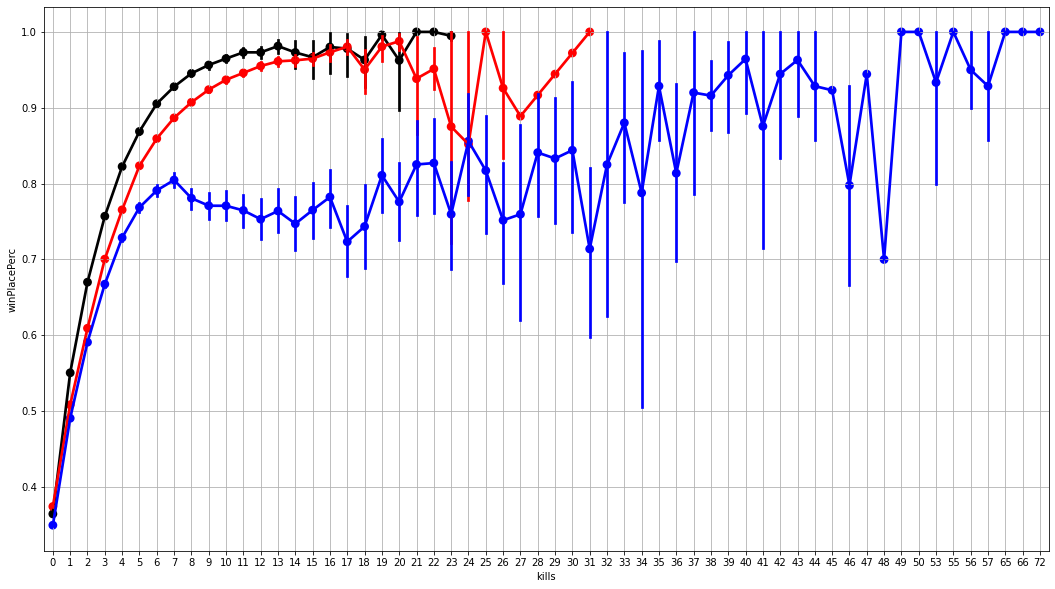

In [25]:
fig,axes = plt.subplots(figsize =(18,10))
sns.pointplot(data=solos, x='kills',y='winPlacePerc',color='black')
sns.pointplot(data=duos, x='kills',y='winPlacePerc',color='red')
sns.pointplot(data=squads, x='kills',y='winPlacePerc',color='blue')
plt.grid()
plt.show()

- 솔로와 듀오 게임의 양상은 비슷하고 킬수와 승리관계가 명확하다.
- 스쿼드 게임의 경우 킬과 승리가 상관관계가 있지만 8킬이상은 그렇게 유의미해 보이지 않다. 게임특성상 스쿼드 게임의 경우 난장이 되는 경우가 많기 때문인듯 싶다.

## 전처리

In [33]:
train_df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [35]:
train_df.drop(['Id', 'groupId', 'matchId', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints','teamKills','weaponsAcquired', 'winPoints'], axis=1, inplace=True)

In [36]:
train_df.columns

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'vehicleDestroys',
       'walkDistance', 'winPlacePerc'],
      dtype='object')

In [47]:
train_df['walkDistance'].quantile(0.99)

4396.0

In [48]:
train_df = train_df.loc[train_df['kills'] <= 7.0]
train_df = train_df.loc[train_df['assists'] <= 3.0]
train_df = train_df.loc[train_df['boosts'] <= 7.0]
train_df = train_df.loc[train_df['damageDealt'] <= 777.0]
train_df = train_df.loc[train_df['DBNOs'] <= 5.0]
train_df = train_df.loc[train_df['headshotKills'] <= 3.0]
train_df = train_df.loc[train_df['heals'] <= 12.0]
train_df = train_df.loc[train_df['killStreaks'] <= 3.0]
train_df = train_df.loc[train_df['rideDistance'] <= 6966.0]
train_df = train_df.loc[train_df['swimDistance'] <= 123.0]
train_df = train_df.loc[train_df['walkDistance'] <= 4396.0]
train_df.sample(10)

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,revives,rideDistance,roadKills,swimDistance,vehicleDestroys,walkDistance,winPlacePerc
2576429,0,1,156.80,0,0,1,35,0,1,1,0,0.0,0,0.0,0,160.5,0.4362
2065334,0,1,131.60,1,0,11,32,0,1,1,0,3384.0,0,0.0,0,1415.0,0.6154
868116,0,0,20.40,0,0,0,69,1231,0,0,0,0.0,0,0.0,0,222.7,0.4021
1209546,0,0,27.51,0,0,0,66,0,0,0,0,0.0,0,0.0,0,901.9,0.4255
819118,0,0,100.00,1,0,0,32,1191,1,1,0,0.0,0,0.0,0,136.3,0.1739
2943044,0,1,349.00,1,1,1,13,0,3,1,0,0.0,0,0.0,0,221.0,0.3125
2017175,0,0,156.60,2,0,0,33,1437,1,1,1,0.0,0,0.0,0,580.7,0.4074
2386327,0,1,268.70,1,0,0,20,1029,2,2,0,379.2,0,0.0,0,706.6,0.3958
362854,0,1,133.40,0,0,2,31,1286,1,1,0,0.0,0,0.0,0,1407.0,0.6392
2629328,0,1,0.00,0,0,0,78,0,0,0,0,0.0,0,0.0,0,238.6,0.2449


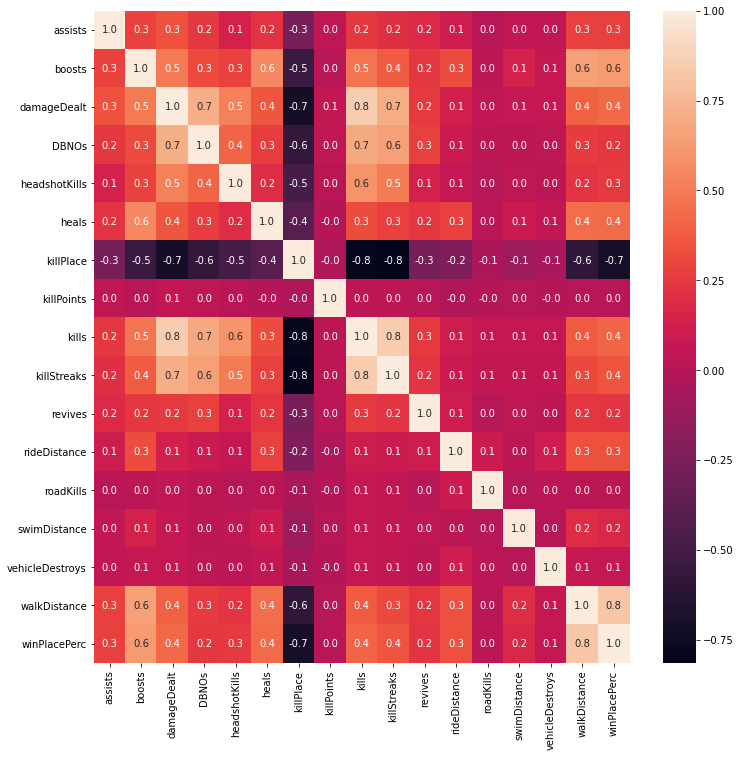

In [51]:
plt.figure(figsize=(12, 12))
sns.heatmap(train_df.corr(), annot=True, fmt= '.1f')
plt.show()

- 상관성을 살펴보면 타겟 변수인 'winPlacePerc'과 상관성이 높은 변수는 'walkDistance','boosts', 'kills','damageDealt','heals'순이며 역으로 'killplace'와도 상관이 있다.(높을수록 낮은숫자)
- 'heals'와 'boosts'간의 상관성, 'walkDistance'와 'boosts','heals'간의 상관성이 돋보인다. 'boosts'와 'kills'간의 상관성이 높다. 이는 교전 전, 교전에 임하기 위해 boost아이템 사용하는 양상과 관련이 깊어 보인다. 

In [ ]:
# 성능이 좋지 않아 출력이 안됨..

sns.set()
cols = ['winPlacePerc', 'walkDistance', 'boosts', 'kills', 'damageDealt', 'killPlace']
sns.pairplot(train_df[cols], height = 2.5)
plt.show()

In [54]:
train_df.columns

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'vehicleDestroys',
       'walkDistance', 'winPlacePerc'],
      dtype='object')

In [58]:
from sklearn.preprocessing import StandardScaler

X = train_df[['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'vehicleDestroys',
       'walkDistance']]

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)
y = train_df['winPlacePerc']

In [64]:
X.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,revives,rideDistance,roadKills,swimDistance,vehicleDestroys,walkDistance
0,0,0,0.00,0,0,0,60,1241,0,0,0,0.0000,0,0.00,0,244.80
1,0,0,91.47,0,0,0,57,0,0,0,0,0.0045,0,11.04,0,1434.00
2,1,0,68.00,0,0,0,47,0,0,0,0,0.0000,0,0.00,0,161.80
3,0,0,32.90,0,0,0,75,0,0,0,0,0.0000,0,0.00,0,202.70
4,0,0,100.00,0,0,0,45,0,1,1,0,0.0000,0,0.00,0,49.75


### 학습-테스트 데이터 분리

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [66]:
from xgboost import XGBRegressor

model_reg = XGBRegressor()
model_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [68]:
pred = model_reg.predict(X_test)
print(mean_absolute_error(y_test, pred))
print(sqrt(mean_squared_error(y_test, pred)))

0.07068083815399646
0.09807103337560909


Text(0, 0.5, 'Predict')

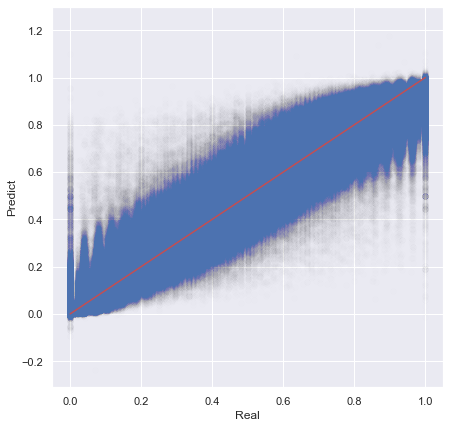

In [75]:
plt.figure(figsize=(7,7))
plt.scatter(x=y_test, y=pred, alpha=0.005)
plt.plot([0,1], [0,1], 'r-')

plt.xlabel('Real')
plt.ylabel('Predict')

- 전체적으로 overestimate 하는 경향이 있다.
- 실제점수는 0.0이지만 괜찮은 점수를 획득했다고 예측하는 경향이 있다.
- 넓은 게임 맵 특성상, 킬-데미지를 주지않고도 많이 돌아다니는 유저들을 통해 해당 예측값이 나온듯 하다. walkDistance가 중요한 변수이기에